<a href="https://colab.research.google.com/github/ekta2306/Online-Sexism-Detection/blob/main/HateXplain_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install emoji
!pip install ekphrasis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/s eta 0:00:00


In [4]:
pip install plotly==4.5.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [5]:
!pip install transformers==4.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.2/184.2 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 53.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)


In [6]:
!pip install ekphrasis

In [7]:
!pip install emoji

In [8]:
import numpy as np
import pandas as pd
import string
from nltk.corpus import stopwords
import re
import os

from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

In [9]:
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens

    # corpus from which the word statistics are going to be used
    # for word segmentation
    segmenter="twitter",

    # corpus from which the word statistics are going to be used
    # for spell correction
    corrector="twitter",

    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=True,  # spell correction for elongated words

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,

    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/usr/local/lib/python3.11/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt
Reading twitter - 1grams ...


/usr/local/lib/python3.11/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [10]:
def print_text(texts,i,j):
    for u in range(i,j):
        print(texts[u])
        print()

In [11]:
df = pd.read_csv('/content/train_new.csv',delimiter=',',encoding='utf-8')  # train set
print(list(df.columns.values)) #file header

['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']


In [12]:
text_array = df["tweet"]
labels = df["class"]
original = text_array

In [13]:
from collections import Counter

In [14]:
df_validate = pd.read_csv('/content/val.csv',delimiter=',',encoding='utf-8') # validation set

In [15]:
df_test = pd.read_csv('/content/test_new.csv',delimiter=',',encoding='utf-8') # test set

In [16]:
#check if need to change
text_array_val = df_validate["tweet"]
labels_val = df_validate["class"]

In [17]:
len(labels_val)

3717

In [18]:
test_set_text = df_test["tweet"]
labels_test_set = df_test["class"]

In [19]:
import re

def remove_website(text):
    pattern = re.compile(r'https?://\S+|www\.\S+|\b\w+\.(com|co|net)\b', re.IGNORECASE)
    return " ".join(["" if pattern.search(word) else word for word in text.split()])

# Clean training set
text_array = text_array.apply(remove_website)
print_text(text_array, 0, 10)

print("**************************************************************************")

# Clean validation set
text_array_val = text_array_val.apply(remove_website)
print_text(text_array_val, 0, 10)

print("**************************************************************************")

# Clean test set
test_set_text = test_set_text.apply(remove_website)
print_text(test_set_text, 0, 10)


RT @BeardedBearsMan: @007BearDownJedi The AFL now has an American draft system #BearBrother! Couple of Yanks are on the playing lists at so&#8230;

RT @6THGRADER: Mom brought me McDonald's for lunch. I had all the bitches on me.

RT @_justcallmetajj: imma cool as bitch so if a bitch don't like me it's a personal problem .

Charlie xcx is bae

&#8220;@H8UHOES: Lmao lexy such a hoe &#128514;&#8221; lmfaooo

RT @Harry_Styles: @kathygriffin I just found an Oreo in my pocket... Is it yours? Thanks for looking after it .xx

RT @BriannDominguez: Green and yellow -lil Wayne &#128155;&#128154;&#128175;&#128175;&#128175;&#128175;

Photoset: The biggest pussy I&#8217;ve seen in China. 

This dude fell cuz he was looking at these bitches in the car.&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;

RT @tanaka_callen: @t_ndyy awwww my niggar thank you so much sure means a lot &#9825;&#9825;

**************************************************************************
@hotzgeor Kept the border op

In [20]:
# Functions for chat word conversion
f = open("/content/slang.txt", "r")
chat_words_str = f.read()
chat_words_map_dict = {}
chat_words_list = []

for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [21]:
# Chat word conversion
# Training set
text_array = text_array.apply(lambda text: chat_words_conversion(text))
print_text(text_array,0,10)
print_text(original,0,10)

print("********************************************************************************")

# Validation set
text_array_val = text_array_val.apply(lambda text: chat_words_conversion(text))
print_text(text_array_val,0,10)

print("********************************************************************************")

# Test set
test_set_text = test_set_text.apply(lambda text: chat_words_conversion(text))
print_text(test_set_text,0,10)

RT @BeardedBearsMan: @007BearDownJedi The AFL now has an American draft system #BearBrother! Couple of Yanks are on the playing lists at so&#8230;

RT @6THGRADER: Mom brought me McDonald's for lunch. I had all the bitches on me.

RT @_justcallmetajj: imma cool as bitch so if a bitch don't like me it's a personal problem .

Charlie xcx is bae

&#8220;@H8UHOES: Laugh My Ass Off lexy such a hoe &#128514;&#8221; lmfaooo

RT @Harry_Styles: @kathygriffin I just found an Oreo in my pocket... Is it yours? Thanks for looking after it .xx

RT @BriannDominguez: Green and yellow -lil Wayne &#128155;&#128154;&#128175;&#128175;&#128175;&#128175;

Photoset: The biggest pussy I&#8217;ve seen in China.

This dude fell cuz he was looking at these bitches in the car.&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;

RT @tanaka_callen: @t_ndyy awwww my niggar thank you so much sure means a lot &#9825;&#9825;

RT @BeardedBearsMan: @007BearDownJedi The AFL now has an American draft system #BearBrother!

In [22]:
#check code in other copy
import re

# Define a dictionary of emoticons and their corresponding meanings
EMOTICONS = {
    ':)': 'smile',
    ':-)': 'smile',
    ':(': 'sad',
    ':-(': 'sad',
    ':D': 'laugh',
    '<3': 'love'
}

def convert_emoticons(text):
    # Iterate over each emoticon in the dictionary
    for emot, meaning in EMOTICONS.items():
        # Replace the emoticon with its corresponding meaning in the text
        text = re.sub(r'(?i)' + re.escape(emot), meaning, text)
    return text

# Test the emoticon conversion function
text = "Hello :-) :-("
text = convert_emoticons(text)
print(text)


Hello smile sad


In [23]:
# Emoticon conversion
# Training set
text_array = text_array.apply(lambda text: convert_emoticons(text))
print_text(text_array,0,10)

print("**********************************************************************************")

# Validation set
text_array_val = text_array_val.apply(lambda text: convert_emoticons(text))
print_text(text_array_val,0,10)

print("**********************************************************************************")

# Test set
test_set_text = test_set_text.apply(lambda text: convert_emoticons(text))
print_text(test_set_text,0,10)

RT @BeardedBearsMan: @007BearDownJedi The AFL now has an American draft system #BearBrother! Couple of Yanks are on the playing lists at so&#8230;

RT @6THGRADER: Mom brought me McDonald's for lunch. I had all the bitches on me.

RT @_justcallmetajj: imma cool as bitch so if a bitch don't like me it's a personal problem .

Charlie xcx is bae

&#8220;@H8UHOES: Laugh My Ass Off lexy such a hoe &#128514;&#8221; lmfaooo

RT @Harry_Styles: @kathygriffin I just found an Oreo in my pocket... Is it yours? Thanks for looking after it .xx

RT @BriannDominguez: Green and yellow -lil Wayne &#128155;&#128154;&#128175;&#128175;&#128175;&#128175;

Photoset: The biggest pussy I&#8217;ve seen in China.

This dude fell cuz he was looking at these bitches in the car.&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;

RT @tanaka_callen: @t_ndyy awwww my niggar thank you so much sure means a lot &#9825;&#9825;

**********************************************************************************
@hotzgeor

In [24]:
# FUnction for removal of emoji
import emoji

def convert_emojis(text):
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub("_|-"," ",text)
    return text

# Training set
text_array = text_array.apply(lambda text: convert_emojis(text))
print_text(text_array,0,10)

print("**************************************************************************")

# Validation set
text_array_val = text_array_val.apply(lambda text: convert_emojis(text))
print_text(text_array_val,0,10)

print("**************************************************************************")

# Test set
test_set_text = test_set_text.apply(lambda text: convert_emojis(text))
print_text(test_set_text,0,10)

RT @BeardedBearsMan: @007BearDownJedi The AFL now has an American draft system #BearBrother! Couple of Yanks are on the playing lists at so&#8230;

RT @6THGRADER: Mom brought me McDonald's for lunch. I had all the bitches on me.

RT @ justcallmetajj: imma cool as bitch so if a bitch don't like me it's a personal problem .

Charlie xcx is bae

&#8220;@H8UHOES: Laugh My Ass Off lexy such a hoe &#128514;&#8221; lmfaooo

RT @Harry Styles: @kathygriffin I just found an Oreo in my pocket... Is it yours? Thanks for looking after it .xx

RT @BriannDominguez: Green and yellow  lil Wayne &#128155;&#128154;&#128175;&#128175;&#128175;&#128175;

Photoset: The biggest pussy I&#8217;ve seen in China.

This dude fell cuz he was looking at these bitches in the car.&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;

RT @tanaka callen: @t ndyy awwww my niggar thank you so much sure means a lot &#9825;&#9825;

**************************************************************************
@hotzgeor Kept th

In [25]:
# Ekphrasis pipe for text pre-processing
def ekphrasis_pipe(sentence):
    cleaned_sentence = " ".join(text_processor.pre_process_doc(sentence))
    return cleaned_sentence

# Training set
text_array = text_array.apply(lambda text: ekphrasis_pipe(text))
print("Training set completed.......")
#Validation set
text_array_val = text_array_val.apply(lambda text: ekphrasis_pipe(text))
print("Validation set completed.......")
#Test set
test_set_text = test_set_text.apply(lambda text: ekphrasis_pipe(text))
print("Test set completed.......")

Training set completed.......
Validation set completed.......
Test set completed.......


In [26]:
# Removing unnecessary punctuations
PUNCT_TO_REMOVE = "\"$%&'()+,-./;=[\]^_`{|}~"
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Training set
text_array = text_array.apply(lambda text: remove_punctuation(text))
print_text(text_array,0,10)

print("********************************************************************")

# Validation set
text_array_val = text_array_val.apply(lambda text: remove_punctuation(text))
print_text(text_array_val,0,10)

print("********************************************************************")

# Test set
test_set_text = test_set_text.apply(lambda text: remove_punctuation(text))
print_text(test_set_text,0,10)

rt <user> : <user> the <allcaps> afl <allcaps> now has an american draft system <hashtag> bear brother <hashtag> ! couple of yanks are on the playing lists at so  # <number> 

rt <user> : mom brought me mcdonald  s for lunch  i had all the bitches on me 

rt @ justcallmetajj : imma cool as bitch so if a bitch do not like me it  s a personal problem 

charlie xcx is bae

 # <number>  <user> : laugh my ass off lexy such a hoe  # <number>  # <number>  lmao <elongated>

rt <user> styles : <user> i just found an oreo in my pocket  <repeated> is it yours ? thanks for looking after it  xx

rt <user> : green and yellow lil wayne  # <number>  # <number>  # <number>  # <number>  # <number>  # <number> 

photoset : the biggest pussy i  # <number>  ve seen in china 

this dude fell cuz he was looking at these bitches in the car   # <number>  # <number>  # <number>  # <number>  # <number>  # <number> 

rt <user> callen : <user> ndyy a <elongated> my niggar thank you so much sure means a lot  # <num

In [27]:
# Count of each label in dataset
from collections import Counter

# Printing training set counts for analysis
print("Elements: ",set(labels))
print("Length: ",len(labels))
print(Counter(labels))

print("**************************************************************************")

# Printing validation set counts for analysis
print("Elements: ",set(labels_val))
print("Length: ",len(labels_val))
print(Counter(labels_val))

print("**************************************************************************")

# Printing Test set counts for analysis
print("Elements: ",set(labels_test_set))
print("Length: ",len(labels_test_set))
print(Counter(labels_test_set))

Elements:  {0, 1, 2}
Length:  17348
Counter({1: 13433, 2: 2914, 0: 1001})
**************************************************************************
Elements:  {0, 1, 2}
Length:  3717
Counter({1: 2878, 2: 624, 0: 215})
**************************************************************************
Elements:  {0, 1, 2}
Length:  3718
Counter({1: 2879, 2: 625, 0: 214})


In [28]:
Y = []
Y_vali = []
Y_test_set = []

# Training set
for i in range(0, len(labels)):
    if labels[i] == 0:
        Y.append(0)
    elif labels[i] == 1:
        Y.append(1)
    elif labels[i] == 2:
        Y.append(2)

# Validation set
for i in range(0, len(labels_val)):
    if labels_val[i] == 0:
        Y_vali.append(0)
    elif labels_val[i] == 1:
        Y_vali.append(1)
    elif labels_val[i] == 2:
        Y_vali.append(2)

# Test set
for i in range(0, len(labels_test_set)):
    if labels_test_set[i] == 0:
        Y_test_set.append(0)
    elif labels_test_set[i] == 1:
        Y_test_set.append(1)
    elif labels_test_set[i] == 2:
        Y_test_set.append(2)


In [29]:
len(labels)

17348

In [30]:
len(Y)

17348

In [31]:
len(labels_val)

3717

In [32]:
len(Y_vali)

3717

In [33]:
# Verifying train set
X = np.asarray(list(text_array))
Y = np.asarray(list(Y))
print(type(X))
print(type(Y))
print(np.shape(X),np.shape(Y))

# Verifying validation set
X_val = np.asarray(list(text_array_val))
Y_vali = np.asarray(list(Y_vali))
print(type(X_val))
print(type(Y_vali))
print(np.shape(X_val),np.shape(Y_vali))

# Verifying test set
X_test_set = np.asarray(list(test_set_text))
Y_test_set = np.asarray(list(Y_test_set))
print(type(X_test_set))
print(type(Y_test_set))
print(np.shape(X_test_set),np.shape(Y_test_set))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(17348,) (17348,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(3717,) (3717,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(3718,) (3718,)


In [34]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [35]:
# Converting to one hot vectors
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)] #u[Y] helps to index each element of Y index at u. U here is a class array
    return Y

In [36]:
Y_oh_train = convert_to_one_hot(np.array(Y), C = 3)
Y_oh_val = convert_to_one_hot(np.array(Y_vali), C = 3)
Y_oh_test_set = convert_to_one_hot(np.array(Y_test_set), C = 3)

In [37]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import string
from nltk.corpus import stopwords
import re
import os
from collections import Counter

In [38]:
!pip install transformers
from transformers import RobertaTokenizerFast, TFRobertaModel, TFBertModel, BertTokenizerFast, ElectraTokenizerFast, TFElectraModel, AlbertTokenizerFast, TFAlbertModel, XLNetTokenizerFast, TFXLNetModel, MPNetTokenizerFast, TFMPNetModel
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import RepeatVector, Concatenate, Dense, Activation, Dot, BatchNormalization, Dropout

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [39]:
print(tf.__version__)

2.18.0


In [40]:
import tensorflow as tf

# Check if a GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

# List available GPU devices
print("All devices: ", tf.config.list_logical_devices('GPU'))


GPU is available
All devices:  [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [41]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [42]:
X = list(X)
X_val = list(X_val)
X_test_set = list(X_test_set)

In [43]:
len(X_val)

3717

In [44]:
len(Y_vali)

3717

In [45]:
model_train_x, model_val_x, Y_train, Y_val = train_test_split(X, Y, test_size=0.05, random_state=44)

In [46]:
train_encodings = tokenizer(model_train_x, max_length=100, truncation=True, padding="max_length", return_tensors='tf')
val_encodings = tokenizer(model_val_x, max_length=100, truncation=True, padding="max_length", return_tensors='tf')
test_encodings = tokenizer(X_val, max_length=100, truncation=True, padding="max_length", return_tensors='tf')

In [47]:
cluster_encodings = tokenizer(X, max_length=100, truncation=True, padding="max_length", return_tensors='tf')

In [48]:
from tensorflow.keras import regularizers

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models
from transformers import TFRobertaModel
from tensorflow.keras.optimizers import Adam

def Offense_classifier(input_shape, dropout_rate=0.3, dense_units=256):
    roberta_model = TFRobertaModel.from_pretrained('roberta-base')

    input_ids = layers.Input(shape=input_shape, dtype=tf.int32, name="input_ids")
    attention_mask = layers.Input(shape=input_shape, dtype=tf.int32, name="attention_mask")

    def roberta_call(inputs):
        input_ids, attention_mask = inputs
        roberta_output = roberta_model(input_ids=input_ids, attention_mask=attention_mask)
        return roberta_output.pooler_output

    roberta_embeddings = layers.Lambda(roberta_call, output_shape=(768,))([input_ids, attention_mask])

    x = layers.BatchNormalization()(roberta_embeddings)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(128, activation='elu')(x)
    x = layers.Dense(32, activation='elu')(x)
    x = layers.Dense(3, activation='elu')(x)
    x = layers.Dense(32, activation='elu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='elu')(x)

    output = layers.Dense(3, activation='softmax')(x)  # Updated for 3-class classification

    return models.Model(inputs=[input_ids, attention_mask], outputs=output)

# Use MirroredStrategy for distributed training (optional)
with tf.distribute.MirroredStrategy().scope():
    model = Offense_classifier((100,))  # Sequence length of 100 tokens

    optimizer = Adam(learning_rate=3e-5)
    loss_fun = tf.keras.losses.SparseCategoricalCrossentropy()  # Suitable for class indices 0/1/2
    metric = ['accuracy']

    model.compile(optimizer=optimizer, loss=loss_fun, metrics=metric)

model.summary()


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 768)       │          0 │ input_ids[0][0],  │
│                     │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 768)       │      3,072 │ lambda[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 768)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     98,432 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      4,128 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │         99 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │        128 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      4,224 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 3)         │        387 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 110,598 (432.02 KB)

 Trainable params: 108,998 (425.77 KB)

 Non-trainable params: 1,600 (6.25 KB)

In [50]:
strategy = tf.distribute.MirroredStrategy()

In [51]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report

class EvaluationMetric(keras.callbacks.Callback):

    def __init__(self, trial_encodings, trial_masks, Y_vali):
        super(EvaluationMetric, self).__init__()
        self.trial_encodings = trial_encodings
        self.trial_masks = trial_masks
        self.Y_vali = Y_vali

    def on_epoch_begin(self, epoch, logs=None):
        print("\nTraining...")

    def on_epoch_end(self, epoch, logs=None):
        print("\nEvaluating...")
        trial_prediction = self.model.predict([self.trial_encodings, self.trial_masks])

        # Use argmax to get class labels (0, 1, 2)
        pred = np.argmax(trial_prediction, axis=1)

        # Show classification report
        print(classification_report(self.Y_vali, pred, digits=3))

# Usage:
evaluation_metric = EvaluationMetric(
    test_encodings["input_ids"],
    test_encodings["attention_mask"],
    Y_vali
)


In [52]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [53]:
from transformers import TFRobertaModel

roberta_model = TFRobertaModel.from_pretrained("roberta-base", from_pt=True)
# "from_pt=True" converts a PyTorch model to TensorFlow.


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [54]:
from tensorflow.keras import regularizers


In [57]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

with strategy.scope():
    # Define and compile your model
    model = Offense_classifier(input_shape=(100,), dropout_rate=0.3, dense_units=256)

    optimizer = Adam(learning_rate=3e-5)
    loss_fun = tf.keras.losses.SparseCategoricalCrossentropy()  # For integer labels 0,1,2
    metrics = ['accuracy']

    model.compile(optimizer=optimizer, loss=loss_fun, metrics=metrics)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [58]:
# Count samples per class
class_counts = np.bincount(Y_train)
total = len(Y_train)
print(f'Examples:\n    Total: {total}\n    Per-class counts: {class_counts}\n')

# Calculate weights: inverse frequency or max ratio
maxi = max(class_counts)
class_weight = {i: (maxi / count if count > 0 else 1.0) for i, count in enumerate(class_counts)}

for k, v in class_weight.items():
    print(f'Weight for class {k}: {v:.2f}')


Examples:
    Total: 16480
    Per-class counts: [  965 12750  2765]

Weight for class 0: 13.21
Weight for class 1: 1.00
Weight for class 2: 4.61


In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Save best model based on validation accuracy
checkpoint = ModelCheckpoint(
    'best_model.h5',                     # File to save
    monitor='val_accuracy',             # Metric to monitor
    verbose=1,
    save_best_only=True,                # Only keep the best
    mode='max'                          # 'max' because higher accuracy is better
)


In [61]:
history = model.fit(
    x=[train_encodings["input_ids"], train_encodings["attention_mask"]],
    y=Y_train,
    validation_data=([val_encodings["input_ids"], val_encodings["attention_mask"]], Y_val),
    callbacks=[evaluation_metric, checkpoint],
    batch_size=64,
    shuffle=True,
    epochs=6,
    class_weight=class_weight
)



Training...
Epoch 1/6
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.5194 - loss: 2.5467
Evaluating...
117/117 ━━━━━━━━━━━━━━━━━━━━ 28s 223ms/step
              precision    recall  f1-score   support

           0      0.124     0.335     0.181       215
           1      0.870     0.890     0.880      2878
           2      0.741     0.229     0.350       624

    accuracy                          0.747      3717
   macro avg      0.578     0.485     0.470      3717
weighted avg      0.806     0.747     0.751      3717


Epoch 1: val_accuracy improved from -inf to 0.73963, saving model to best_model.h5


258/258 ━━━━━━━━━━━━━━━━━━━━ 159s 586ms/step - accuracy: 0.5196 - loss: 2.5460 - val_accuracy: 0.7396 - val_loss: 1.0052

Training...
Epoch 2/6
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.6165 - loss: 1.9953
Evaluating...
117/117 ━━━━━━━━━━━━━━━━━━━━ 23s 195ms/step
              precision    recall  f1-score   support

           0      0.172     0.600     0.268       215
           1      0.935     0.752     0.833      2878
           2      0.594     0.623     0.608       624

    accuracy                          0.721      3717
   macro avg      0.567     0.658     0.570      3717
weighted avg      0.834     0.721     0.763      3717


Epoch 2: val_accuracy did not improve from 0.73963
258/258 ━━━━━━━━━━━━━━━━━━━━ 129s 500ms/step - accuracy: 0.6165 - loss: 1.9951 - val_accuracy: 0.7350 - val_loss: 0.8093

Training...
Epoch 3/6
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.6333 - loss: 1.7226
Evaluating...
117/117 ━━━━━━━━━━━━━━━━━━━━ 23s 196ms/step
         

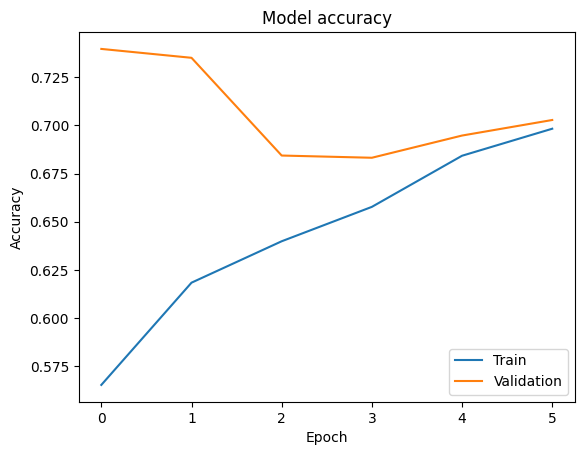

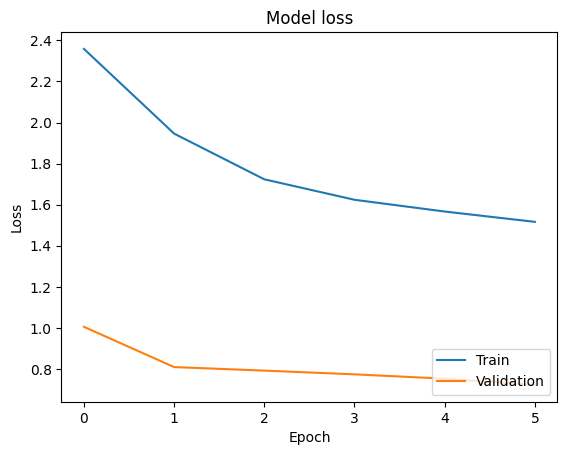

In [62]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [63]:
test_set_encodings = tokenizer(X_test_set, max_length=100, truncation=True, padding="max_length", return_tensors='tf')

In [64]:
answer = model.predict([test_set_encodings["input_ids"], test_set_encodings["attention_mask"]])

117/117 ━━━━━━━━━━━━━━━━━━━━ 24s 208ms/step


In [65]:
import numpy as np

pred = []
for i in range(len(X_test_set)):
    num = answer[i]
    predicted_class = np.argmax(num)  # Select class with highest probability
    pred.append(predicted_class)


In [66]:
con_mat = tf.math.confusion_matrix(labels=Y_test_set, predictions=pred)
print(con_mat)

tf.Tensor(
[[ 136   49   29]
 [ 537 1987  355]
 [  69   43  513]], shape=(3, 3), dtype=int32)


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

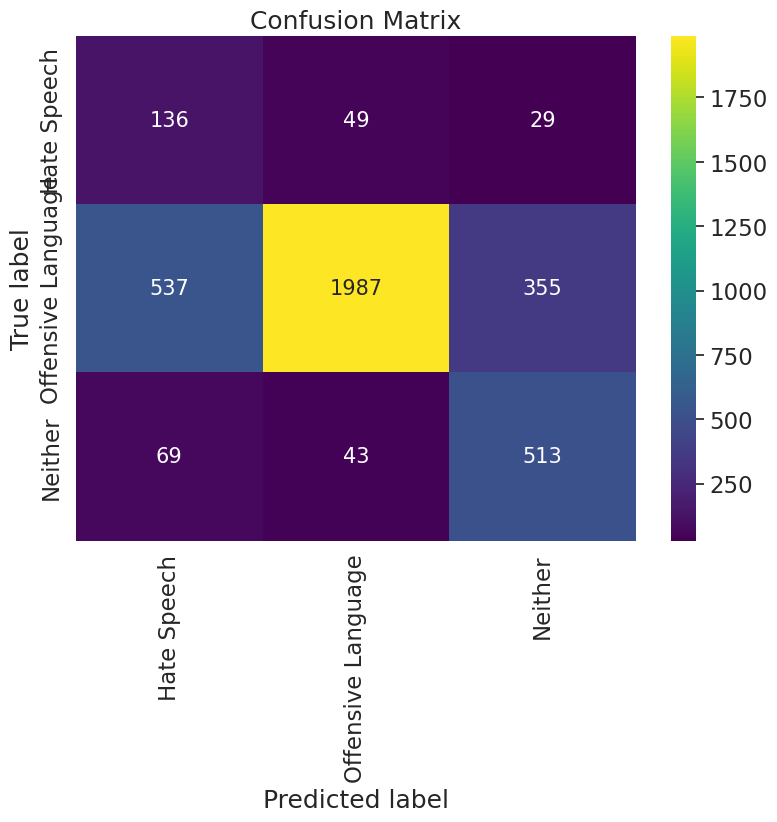

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ["Hate Speech", "Offensive Language", "Neither"]

plt.figure(figsize=(8, 8))
sns.set(font_scale=1.5)

sns.heatmap(
    con_mat,
    annot=True,
    cmap=plt.cm.viridis,
    fmt='d',
    xticklabels=class_names,
    yticklabels=class_names,
    annot_kws={"size": 15}
)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()


In [69]:
from sklearn.metrics import f1_score, classification_report

In [70]:
f1_score(Y_test_set, pred, average='macro')

0.5867215712700159

In [73]:
print(classification_report(Y_test_set, pred, target_names=["Hate Speech", "Offensive Language", "Neither"], digits=3))


                    precision    recall  f1-score   support

       Hate Speech      0.183     0.636     0.285       214
Offensive Language      0.956     0.690     0.802      2879
           Neither      0.572     0.821     0.674       625

          accuracy                          0.709      3718
         macro avg      0.570     0.715     0.587      3718
      weighted avg      0.847     0.709     0.750      3718



In [74]:
answer_train = model.predict([cluster_encodings["input_ids"], cluster_encodings["attention_mask"]])

543/543 ━━━━━━━━━━━━━━━━━━━━ 108s 198ms/step


In [75]:
answer_train

array([[0.23119135, 0.01591734, 0.7528913 ],
       [0.07614554, 0.34978837, 0.57406604],
       [0.2514176 , 0.63339555, 0.11518681],
       ...,
       [0.40407908, 0.5328307 , 0.06309017],
       [0.31555864, 0.1960954 , 0.48834586],
       [0.09073728, 0.698291  , 0.21097171]], dtype=float32)

In [76]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [77]:
# 3 neuron output
model.layers[-6].name

'dense_13'

In [79]:
# Print all layer names
for layer in model.layers:
    print(layer.name)


input_ids
attention_mask
lambda_2
batch_normalization_4
dropout_2
dense_12
dense_13
dense_14
dense_15
batch_normalization_5
dense_16
dense_17


In [80]:
from tensorflow.keras.models import Model

# Find the output tensor of the desired layer by name
intermediate_output = [layer.output for layer in model.layers if layer.name == 'dense_12'][0]

# Create a new model that ends at that intermediate layer
cluster_dense_3 = Model(inputs=model.inputs, outputs=intermediate_output)


In [81]:
cluster_3 = cluster_dense_3.predict([cluster_encodings["input_ids"], cluster_encodings["attention_mask"]])


543/543 ━━━━━━━━━━━━━━━━━━━━ 105s 177ms/step


In [87]:
pred_train = []

for i in range(len(Y)):
    score = (
        float(answer_train[i][0]) if isinstance(answer_train[i], (list, np.ndarray))
        else float(answer_train[i])
    )

    if 0 < score <= 0.3:
        pred_train.append(0)  # Hate Speech
    elif 0.7 <= score < 1:
        pred_train.append(1)  # Offensive Language
    elif 0.3 < score < 0.7:
        pred_train.append(2)  # Neither
    else:
        pred_train.append(2)  # For exact 0 or 1 (edge cases)

print("Sample of predicted labels:", pred_train[:10])


Sample of predicted labels: [0, 0, 0, 0, 2, 0, 0, 0, 2, 2]


In [84]:
import numpy as np

flag = []
x_ = []
y_ = []
z_ = []

for i in range(len(Y)):
    x_.append(cluster_3[i][1])
    y_.append(cluster_3[i][0])
    z_.append(cluster_3[i][2])

    score_raw = answer_train[i]

    # Extract first float if it's an array or list
    score = (
        float(score_raw[0])
        if isinstance(score_raw, (list, np.ndarray))
        else float(score_raw)
    )

    # Class assignment based on thresholds
    if 0 < score <= 0.3:
        flag.append(0)  # Hate Speech
    elif 0.7 <= score < 1:
        flag.append(1)  # Offensive Language
    elif 0.3 < score < 0.7:
        flag.append(2)  # Neither
    else:
        flag.append(2)  # For exact 0 or 1

from collections import Counter
print("Class distribution:", Counter(flag))


Class distribution: Counter({0: 11631, 2: 4365, 1: 1352})


In [88]:
Counter(flag)

Counter({0: 11631, 2: 4365, 1: 1352})

In [89]:
con_mat = tf.math.confusion_matrix(labels=Y, predictions=pred_train)
print(con_mat)

tf.Tensor(
[[ 172  444  385]
 [9030  840 3563]
 [2429   68  417]], shape=(3, 3), dtype=int32)


In [90]:
import pandas as pd
import plotly.express as px

# Map class indices to new labels
pred_colour = []
for i in range(len(flag)):
    if flag[i] == 0:
        pred_colour.append("Hate Speech")
    elif flag[i] == 1:
        pred_colour.append("Offensive Language")
    elif flag[i] == 2:
        pred_colour.append("Neither")
    else:
        pred_colour.append("Unknown")  # Optional fallback

# Create DataFrame for Plotly
test_df = pd.DataFrame({'x': x_, 'y': y_, 'z': z_, 'Labels': pred_colour})

# Create 3D scatter plot
fig = px.scatter_3d(test_df, x='x', y='y', z='z', color='Labels')

# Style settings
fig.update_traces(
    marker={
        'size': 1,
        'opacity': 0.7,
        'colorscale': 'Oryel',
    }
)
fig.update_layout(
    legend={'itemsizing': 'constant', 'font_size': 18},
    font_size=15,
    scene_aspectmode='cube',
    width=750,
    height=500,
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()


In [91]:
import pandas as pd
import plotly.express as px

# Map numerical predictions to labels
pred_colour = []
for i in range(len(pred_train)):
    if pred_train[i] == 0:
        pred_colour.append("Hate Speech")
    elif pred_train[i] == 1:
        pred_colour.append("Offensive Language")
    elif pred_train[i] == 2:
        pred_colour.append("Neither")
    else:
        pred_colour.append("Unknown")

# Create DataFrame for 3D visualization
test_df = pd.DataFrame({'X': x_, 'Y': y_, 'Z': z_, 'Labels': pred_colour})

# Generate the 3D scatter plot
fig = px.scatter_3d(test_df, x='X', y='Y', z='Z', color='Labels')

# Customize marker and layout
fig.update_traces(
    marker={
        'size': 1,
        'opacity': 1,
        'colorscale': 'rainbow',
    }
)
fig.update_layout(
    legend={'itemsizing': 'constant'},
    font_size=14,
    scene_aspectmode='cube',
    width=850,
    height=750,
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()


In [92]:
model.layers[-8].name

'dropout_2'

In [93]:
from tensorflow.keras.models import Model

# Safely get the output of the layer using index (-8) or name if you know it
intermediate_output = model.layers[-8].output

# Create the intermediate model
cluster_bert = Model(inputs=model.inputs, outputs=intermediate_output)

# Predict using the strategy scope
with strategy.scope():
    cl_bert = cluster_bert.predict([cluster_encodings["input_ids"], cluster_encodings["attention_mask"]])


543/543 ━━━━━━━━━━━━━━━━━━━━ 107s 184ms/step


In [94]:
len(cl_bert)

17348

In [95]:
flag_bert = []
x_bert = []
y_bert = []
z_bert = []

for i in range(len(Y)):
    # Append cluster coordinates (assuming cl_bert[i] = [x, y, z])
    x_bert.append(cl_bert[i][0])
    y_bert.append(cl_bert[i][1])
    z_bert.append(cl_bert[i][2])

    # Safely extract scalar score (handles if answer_train[i] is array-like)
    score = (
        float(answer_train[i][0]) if isinstance(answer_train[i], (list, np.ndarray))
        else float(answer_train[i])
    )

    # Assign class based on thresholds
    if 0 < score <= 0.28:
        flag_bert.append(0)   # Hate Speech
    elif 0.28 < score < 0.8:
        flag_bert.append(2)   # Neither
    elif 0.8 <= score < 1:
        flag_bert.append(1)   # Offensive Language
    else:
        flag_bert.append(2)   # fallback to Neither (for edge cases 0 or 1)

print(f"Total points processed: {len(Y)}")


Total points processed: 17348


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Convert coordinates into feature matrix (NumPy array)
X = np.array(list(zip(x_bert, y_bert, z_bert)))

# Convert labels to NumPy array
y = np.array(flag_bert)

# Split the data (stratify to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest model: {accuracy:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of the Random Forest model: 0.6225

Classification Report:
              precision    recall  f1-score   support

           0     0.6664    0.8614    0.7515      3370
           1     0.1429    0.0097    0.0182       206
           2     0.4012    0.2056    0.2719      1629

    accuracy                         0.6225      5205
   macro avg     0.4035    0.3589    0.3472      5205
weighted avg     0.5627    0.6225    0.5724      5205


Confusion Matrix:
[[2903    8  459]
 [ 163    2   41]
 [1290    4  335]]


In [97]:
from sklearn.cluster import KMeans

# Ensure cl_bert is a NumPy array
import numpy as np
cl_bert_np = np.array(cl_bert)

# Fit KMeans with 3 clusters and random state 44
kmeans_bert = KMeans(n_clusters=3, random_state=44)
kmeans_bert.fit(cl_bert_np)

# Predict cluster labels for cl_bert data
y_kmeans_bert = kmeans_bert.predict(cl_bert_np)


In [100]:
# 1 index values are sexist
# 0 index values are not sexist
# 2 index values are neutral

# Count how many times flag_bert == 2 (neutral) and predicted cluster is 1
count = 0
for i in range(len(flag_bert)):
    if flag_bert[i] == 2 and y_kmeans_bert[i] == 1:
        count += 1
print("Count of neutral samples predicted as cluster 1:", count)

# Swap cluster labels 0 and 1 in y_kmeans_bert, keep 2 as is
for i in range(len(y_kmeans_bert)):
    if y_kmeans_bert[i] == 0:
        y_kmeans_bert[i] = 1
    elif y_kmeans_bert[i] == 1:
        y_kmeans_bert[i] = 0
    # If it's 2, keep as 2 (neutral)

# Recompute flag_bert based on answer_train thresholds and coordinates from cl_bert
flag_bert = []
x_bert = []
y_bert = []
z_bert = []

for i in range(len(Y)):
    x_bert.append(cl_bert[i][0])
    y_bert.append(cl_bert[i][1])
    z_bert.append(cl_bert[i][2])

    score = answer_train[i]

    # Check if score is array-like and has more than 1 element
    if hasattr(score, 'shape') and len(score) > 1:
        # Example: take first element or the max
        score = score[0]   # or score = np.max(score) or np.argmax(score)
    else:
        # If it's a scalar-like array of size 1, get the scalar
        if hasattr(score, 'shape') and len(score) == 1:
            score = score.item()

    if 0 < score <= 0.3:
        flag_bert.append(0)  # Not sexist
    elif 0.7 <= score < 1:
        flag_bert.append(1)  # Sexist
    elif 0.3 < score < 0.7:
        flag_bert.append(2)  # Neutral
    else:
        flag_bert.append(2)  # Default neutral

print("Total samples processed:", len(flag_bert))



# Compute confusion matrix between true labels and predicted clusters
import tensorflow as tf
con_mat = tf.math.confusion_matrix(labels=flag_bert, predictions=y_kmeans_bert)
print("Confusion matrix:")
print(con_mat.numpy())


Count of neutral samples predicted as cluster 1: 0
Total samples processed: 17348
Confusion matrix:
[[3615 3586 4430]
 [ 290  759  303]
 [1209 1994 1162]]


In [101]:
import sklearn
print(sklearn.metrics.classification_report(flag_bert, y_kmeans_bert, output_dict=False, digits=3))

              precision    recall  f1-score   support

           0      0.707     0.311     0.432     11631
           1      0.120     0.561     0.197      1352
           2      0.197     0.266     0.227      4365

    accuracy                          0.319     17348
   macro avg      0.341     0.379     0.285     17348
weighted avg      0.533     0.319     0.362     17348



In [104]:
from scipy.stats import mode
import numpy as np

def match_clusters(true_labels, cluster_labels):
    labels = np.unique(true_labels)
    clusters = np.unique(cluster_labels)
    label_map = {}

    for cluster in clusters:
        mask = cluster_labels == cluster
        cluster_true_labels = true_labels[mask]

        if len(cluster_true_labels) == 0:
            # No samples in this cluster, assign a default label, say -1
            label_map[cluster] = -1
            continue

        mode_result = mode(cluster_true_labels)

        # Check if mode_result.mode is scalar or array
        if hasattr(mode_result.mode, '__len__'):
            most_common_label = mode_result.mode[0]
        else:
            most_common_label = mode_result.mode

        label_map[cluster] = most_common_label

    new_preds = np.array([label_map.get(cl, -1) for cl in cluster_labels])
    return new_preds

flag_bert_np = np.array(flag_bert)
y_kmeans_bert_np = np.array(y_kmeans_bert)

mapped_preds = match_clusters(flag_bert_np, y_kmeans_bert_np)

from sklearn.metrics import classification_report
print(classification_report(flag_bert_np, mapped_preds, digits=3))


              precision    recall  f1-score   support

           0      0.670     1.000     0.803     11631
           1      0.000     0.000     0.000      1352
           2      0.000     0.000     0.000      4365

    accuracy                          0.670     17348
   macro avg      0.223     0.333     0.268     17348
weighted avg      0.450     0.670     0.538     17348



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [105]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

In [106]:
centers_bert = kmeans_bert.cluster_centers_

In [107]:
from scipy.spatial.distance import cosine

# Assuming 3 clusters (offensive, non-offensive, neutral)
cluster_labels = ['offensive', 'non_offensive', 'neutral']

# Initialize dictionary to hold similarity scores for each cluster
svns = {label: [] for label in cluster_labels}

for i in range(len(Y)):
    sample = cl_bert[i]
    for idx, label in enumerate(cluster_labels):
        # cosine distance divided by 2, then converted to similarity (1 - value)
        sim = 1 - (cosine(sample, centers_bert[idx]) / 2)
        svns[label].append(sim)

# Example: print lengths to verify all lists are complete
for label in cluster_labels:
    print(f"Length of svns_{label}: {len(svns[label])}")

# Access individual lists:
svns_off = svns['offensive']
svns_noff = svns['non_offensive']
svns_neu = svns['neutral']


Length of svns_offensive: 17348
Length of svns_non_offensive: 17348
Length of svns_neutral: 17348


In [108]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [109]:
pred_colour = []
for i in range(len(Y)):
    if y_kmeans_bert[i] == 2:
        pred_colour.append("Neutral")
    elif y_kmeans_bert[i] == 1:
        pred_colour.append("Not Offensive")
    elif y_kmeans_bert[i] == 0:
        pred_colour.append("Offensive")
    else:
        pred_colour.append("Unknown")  # fallback just in case

# Prepare dataframe for plotting
test_df = pd.DataFrame({
    'SVNS_Offensive': svns_off,
    'SVNS_Not_Offensive': svns_noff,
    'SVNS_Neutral': svns_neu,
    'Labels': pred_colour
})

fig = px.scatter_3d(
    test_df,
    x='SVNS_Offensive',
    y='SVNS_Not_Offensive',
    z='SVNS_Neutral',
    color='Labels',
    color_discrete_map={
        "Offensive": "red",
        "Not Offensive": "green",
        "Neutral": "blue",
        "Unknown": "gray"
    },
    title="3D Scatter of SVNS Scores with Cluster Labels"
)

fig.update_traces(marker=dict(size=3, opacity=0.8))
fig.update_layout(
    legend=dict(itemsizing='constant', font_size=16),
    font_size=14,
    scene_aspectmode='cube',
    width=900,
    height=700,
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()


In [110]:
num=len(Y)

In [111]:
from sklearn.metrics import classification_report

pred_krobert = []

for i in range(num):
    # Check which SVNS score is the highest for each sample
    if svns_off[i] > svns_neu[i] + svns_noff[i]:
        pred_krobert.append(0)  # Offensive
    elif svns_noff[i] > svns_neu[i] and svns_noff[i] > svns_off[i]:
        pred_krobert.append(1)  # Not Offensive
    elif svns_neu[i] > svns_noff[i] and svns_neu[i] > svns_off[i]:
        pred_krobert.append(2)  # Neutral
    else:
        pred_krobert.append(0)  # Default/fallback to Offensive

print(classification_report(Y, pred_krobert, output_dict=False, digits=3))


              precision    recall  f1-score   support

           0      0.069     0.481     0.121      1001
           1      0.812     0.350     0.489     13433
           2      0.257     0.409     0.316      2914

    accuracy                          0.367     17348
   macro avg      0.379     0.413     0.309     17348
weighted avg      0.676     0.367     0.439     17348



In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare feature matrix and labels
X = np.column_stack((svns_off, svns_noff, svns_neu))  # Shape: (num_samples, 3)
y = np.array(Y)  # True labels

# Split into train and test sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train logistic regression model with balanced class weights to handle imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.071     0.327     0.116       300
           1      0.874     0.403     0.551      4031
           2      0.285     0.638     0.394       874

    accuracy                          0.438      5205
   macro avg      0.410     0.456     0.354      5205
weighted avg      0.728     0.438     0.500      5205



In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Stack the SVNS features as input vectors
X = np.column_stack((svns_off, svns_noff, svns_neu))  # Shape (num_samples, 3)

# True labels array (0 = Hate Speech, 1 = Offensive, 2 = Normal)
y = np.array(Y)

# Split into train and test sets, stratified to keep class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize Logistic Regression with balanced class weights (important if classes are imbalanced)
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42, multi_class='ovr')

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Show detailed classification report
print(classification_report(y_test, y_pred, digits=3))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



              precision    recall  f1-score   support

           0      0.091     0.197     0.125       300
           1      0.870     0.555     0.677      4031
           2      0.282     0.642     0.392       874

    accuracy                          0.549      5205
   macro avg      0.414     0.464     0.398      5205
weighted avg      0.726     0.549     0.598      5205



In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

X = np.column_stack((svns_off, svns_noff, svns_neu))
y = np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf_model = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight='balanced'
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.263     0.017     0.031       300
           1      0.793     0.973     0.874      4031
           2      0.519     0.142     0.223       874

    accuracy                          0.778      5205
   macro avg      0.525     0.377     0.376      5205
weighted avg      0.716     0.778     0.716      5205



In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.241     0.023     0.043       300
           1      0.794     0.971     0.874      4031
           2      0.532     0.151     0.235       874

    accuracy                          0.779      5205
   macro avg      0.523     0.382     0.384      5205
weighted avg      0.718     0.779     0.719      5205

